# Clustering data points with search algorithms
### import the three metaheuristic algorithms

In [1]:
from bat import BatAlgorithm
from bees import BeesAlgorithm
from firefly import FireflyAlgorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### define an auxiliary function for the k-means clustering loss depending on the data points

In [3]:
def create_cluster_loss(X, k):
    def cluster_loss(x):
        centers = np.split(x, k)
        dists = np.zeros((len(centers), len(X)))
        for i in range(len(centers)):
            dists[i] = np.sqrt(np.sum(np.square(X-centers[i]), axis=1))
        return np.sum(np.min(dists, axis=0))
    
    return cluster_loss

### define a second auxiliary function for plotting data points with given cluster centers

In [4]:
from sklearn.decomposition import PCA

def plot_clustered_data(X, centers):
    dists = np.zeros((len(centers), len(X)))
    for i in range(len(centers)):
        dists[i] = np.sqrt(np.sum(np.square(X-centers[i]), axis=1))
    respons = np.argmin(dists, axis=0)
    if X.shape[1] > 2:
        pca = PCA(2).fit_transform(np.concatenate([X, centers], axis=0))
        
    X = pca[:-len(centers)]
    centers = pca[-len(centers):]
    
    plt.title('clustered data points')
    plt.scatter(X.T[0], X.T[1], c=respons)
    centers = np.array(centers)
    plt.scatter(centers.T[0], centers.T[1], c='black', marker='X')
    plt.show()

# Example 1: Clustering iris data set:

### import the iris data set

In [5]:
from sklearn.datasets import load_iris
iris_data = load_iris()['data']
iris_labels = load_iris()['target']

### plot the ground truth cluster assignments

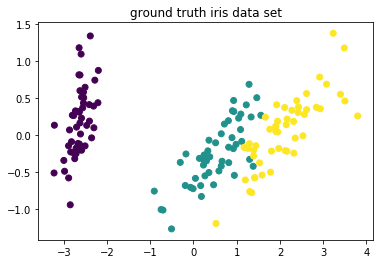

In [6]:
plt.title('ground truth iris data set')
iris_data_pca = PCA(2).fit_transform(iris_data)
plt.scatter(iris_data_pca.T[0], iris_data_pca.T[1], c=iris_labels)
plt.show()

### algorithm-independent parameters

In [7]:
objective = 'min'
n = iris_data.shape[0]
k = 3
d_iris = iris_data.shape[1] * k # we concatenate all k cluster centers to one vector, i.e. k times 4 dimensions in iris data set
range_min  = -5.0
range_max = 5.0
T = 200

### create the clustering loss function

In [8]:
iris_loss = create_cluster_loss(iris_data, k=k)

### algorithm-dependent parameters and instantiations (for iris data)

In [9]:
bees = BeesAlgorithm(d=d_iris, n=n, range_min=range_min, range_max=range_max,
                     nb=50, ne=20, nrb=5, nre=10, shrink_factor=0.8, stgn_lim=5)

bat = BatAlgorithm(d=d_iris, n=n, range_min=range_min, range_max=range_max,
                   a=0.5, r=0.5, q_min=0.0, q_max=3.0)

firefly = FireflyAlgorithm(d=d_iris, n=n, range_min=range_min, range_max=range_max,
                           alpha=1.0, beta0=1.0, gamma=0.5)

### apply bees algorithm and plot the cluster assignments

(array([4.34815197, 4.77292041, 2.37082569, 3.67263184, 5.        ,
       2.62966466, 4.67332251, 1.35247959, 4.84576882, 3.46699026,
       1.81961733, 0.45903191]), 197.40751626743568)
12.6404013


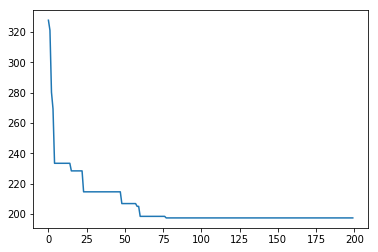

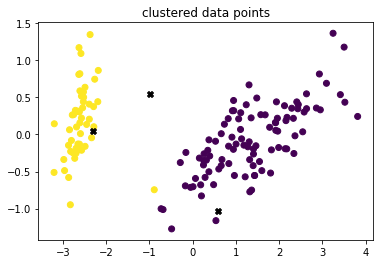

In [10]:
solution_iris, latency_iris = bees.search(objective, iris_loss, T)
solution_iris_x, solution_iris_y = solution_iris
print(solution_iris)
print(latency_iris)
bees.plot_history()

centers_iris = np.split(solution_iris_x, k)
plot_clustered_data(iris_data, centers_iris)

### apply bat algorithm and plot the cluster assignments

(array([-4.81689484, -4.69794766, -5.        , -4.84208355,  5.        ,
        2.92010835,  3.91886517,  1.25743827, -4.85980321,  4.95284114,
       -4.76562504,  4.95722594]), 320.3206146045019)
9.521452400000001


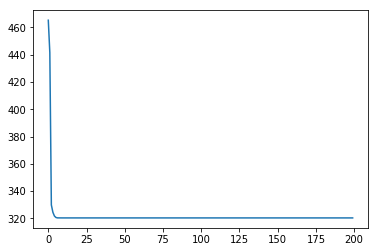

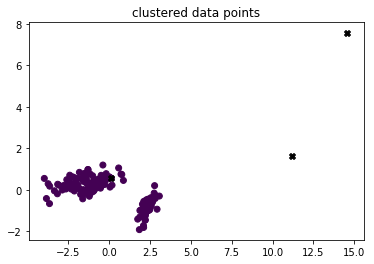

In [11]:
solution_iris, latency_iris = bat.search(objective, iris_loss, T)
solution_iris_x, solution_iris_y = solution_iris
print(solution_iris)
print(latency_iris)
bat.plot_history()

centers_iris = np.split(solution_iris_x, k)
plot_clustered_data(iris_data, centers_iris)

### apply firefly algorithm and plot the cluster assignments

(array([-2.52237738, -0.95460744,  5.08422385,  1.88681356, -3.22042405,
       -5.87200678, -6.93212273, -4.43436188,  5.96256277,  2.52880849,
        4.18344595,  1.73498065]), 299.69711413141795)
502.40778989999995


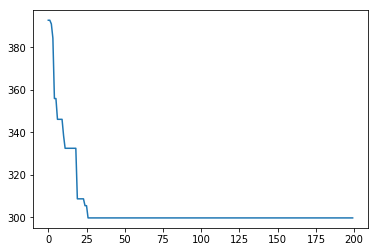

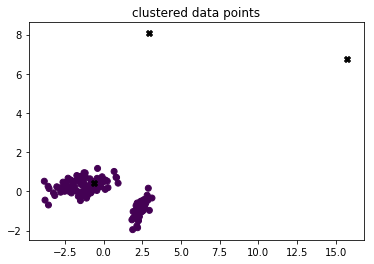

In [12]:
solution_iris, latency_iris = firefly.search(objective, iris_loss, T)
solution_iris_x, solution_iris_y = solution_iris
print(solution_iris)
print(latency_iris)
firefly.plot_history()

centers_iris = np.split(solution_iris_x, k)
plot_clustered_data(iris_data, centers_iris)

# Example 2: Clustering random data set:

### define another auxiliary function for creating a random clustering dataset, with n samples, m features and a given number of clusters

In [23]:
def create_random_cluster_dataset(n, m, num_clusters, range_min, range_max):
    means = np.random.uniform(range_min, range_max, (num_clusters, m))
    covs = [np.diag(np.random.uniform(range_min, range_max, m)) + np.random.uniform(range_min, range_max, 1)*np.eye(m).T for i in range(num_clusters)]
    sizes = np.sort(np.random.choice(np.arange(n-1), num_clusters-1, replace=False))
    sizes = [(sizes[i] if i<len(sizes) else n-1)-(sizes[i-1] if i>0 else -1) for i in range(len(sizes)+1)]
    data_per_cluster = [np.random.multivariate_normal(means[i], covs[i], size=sizes[i]) for i in range(num_clusters)]
    return np.concatenate(data_per_cluster), np.concatenate([np.repeat(i, sizes[i]) for i in range(num_clusters)])

### create a random clustering dataset with n samples, m features and k clusters

In [29]:
n = 300
k = 3
m = 4
random_data, random_labels = create_random_cluster_dataset(n, m, k, -5.0, 5.0)

C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


### plot the ground truth cluster assignments

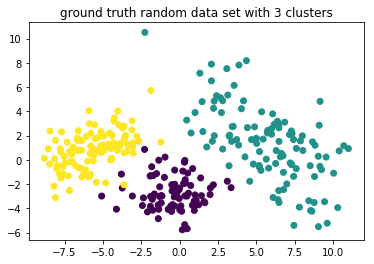

In [30]:
plt.title(f'ground truth random data set with {k} clusters')
random_data_pca = PCA(2).fit_transform(random_data)
plt.scatter(random_data_pca.T[0], random_data_pca.T[1], c=random_labels)
plt.show()

### create the clustering loss function

In [31]:
random_loss = create_cluster_loss(random_data, k=k)

### algorithm-independent parameters

In [32]:
objective = 'min'
d_random = m * k # we concatenate all k cluster centers to one vector
range_min  = -5.0
range_max = 5.0
T = 200

### algorithm-dependent parameters and instantiations (for random data)

In [33]:
bees = BeesAlgorithm(d=d_random, n=n, range_min=range_min, range_max=range_max,
                     nb=50, ne=20, nrb=5, nre=10, shrink_factor=0.8, stgn_lim=5)

bat = BatAlgorithm(d=d_random, n=n, range_min=range_min, range_max=range_max,
                   a=0.5, r=0.5, q_min=0.0, q_max=3.0)

firefly = FireflyAlgorithm(d=d_random, n=n, range_min=range_min, range_max=range_max,
                           alpha=1.0, beta0=1.0, gamma=0.5)

### apply bees algorithm and plot the cluster assignments

(array([ 4.76019347,  0.14998461, -2.38643452, -4.36993541, -3.20526817,
        2.87711018,  3.17010712,  1.36130302, -2.31478829,  1.78706067,
       -0.85163013, -3.08301635]), 1120.0361833790687)
21.759731799998917


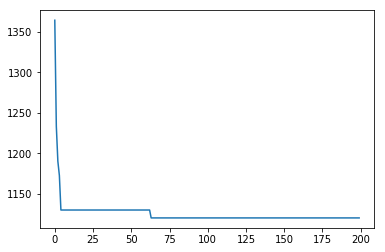

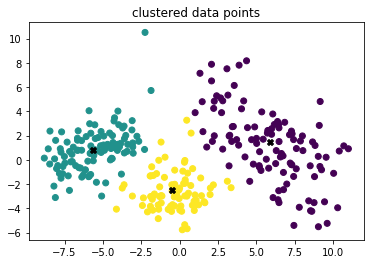

In [34]:
solution_random, latency_random = bees.search(objective, random_loss, T)
solution_random_x, solution_random_y = solution_random
print(solution_random)
print(latency_random)
bees.plot_history()

centers_random = np.split(solution_random_x, k)
plot_clustered_data(random_data, centers_random)

### apply bat algorithm and plot the cluster assignments

(array([ 1.40309899,  3.69976211,  0.58376749, -0.88962553,  1.24363483,
        3.68111316, -1.36076434, -5.        ,  2.63035823, -4.21588015,
        3.32253648,  0.17223544]), 991.1163236212291)
26.750709099999995


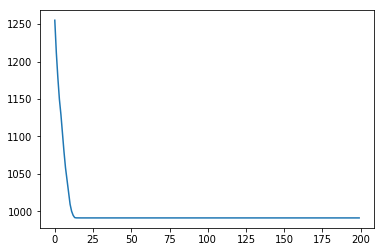

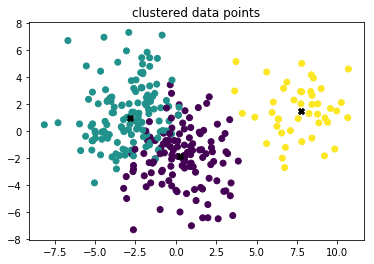

In [20]:
solution_random, latency_random = bat.search(objective, random_loss, T)
solution_random_x, solution_random_y = solution_random
print(solution_random)
print(latency_random)
bat.plot_history()

centers_random = np.split(solution_random_x, k)
plot_clustered_data(random_data, centers_random)

### apply firefly algorithm and plot the cluster assignments

(array([ 3.78146589, -1.79299952,  1.43043787, -0.22786512,  0.49300786,
        4.6385065 , -2.97491518, -2.0939291 ,  0.6044629 ,  3.64667611,
        0.5218038 , -3.70025307]), 1132.1696045194362)
2541.9586366000003


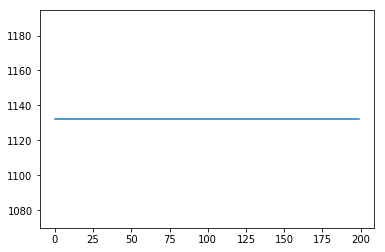

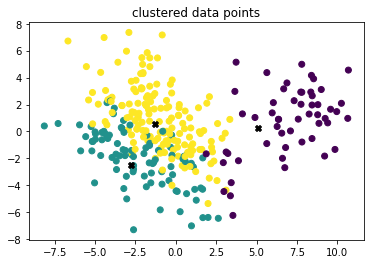

In [21]:
solution_random, latency_random = firefly.search(objective, random_loss, T)
solution_random_x, solution_random_y = solution_random
print(solution_random)
print(latency_random)
firefly.plot_history()

centers_random = np.split(solution_random_x, k)
plot_clustered_data(random_data, centers_random)